In [10]:
import pandas as pd
data = pd.read_csv('outputfile.csv', nrows=10000)

In [11]:
print(data)
data.to_csv('Data/point_data.txt', sep='\t', index=True, header=False)

               X            Y      Z      Red    Green     Blue
0     314519.896  5809580.105  10.65  59136.0  60672.0  60160.0
1     314520.576  5809744.605  10.79  56320.0  57856.0  57344.0
2     314671.596  5809679.185   2.49  43008.0  41728.0  36096.0
3     314555.476  5809679.825   6.31  13056.0  15872.0  12288.0
4     314920.796  5809913.535  -0.46  13568.0  23552.0  22784.0
...          ...          ...    ...      ...      ...      ...
9995  314518.996  5809885.725   4.29  29184.0  37120.0  21760.0
9996  314594.566  5809744.845   3.82  56064.0  58624.0  60928.0
9997  314777.266  5809672.905  15.65  53248.0  54528.0  53504.0
9998  314747.606  5809543.035   3.00  30976.0  29952.0  20224.0
9999  314884.206  5809563.025   1.92  35328.0  29440.0  21248.0

[10000 rows x 6 columns]


In [12]:
import numpy as np
data_rectangles = data[['X','Y','Z']]
data_rectangles['x_min'] = data_rectangles['X'] - np.random.uniform(0.1, 0.2, len(data_rectangles))
data_rectangles['x_max'] = data_rectangles['X'] + np.random.uniform(0.1, 0.2, len(data_rectangles))
data_rectangles['y_min'] = data_rectangles['Y'] - np.random.uniform(0.1, 0.2, len(data_rectangles))
data_rectangles['y_max'] = data_rectangles['Y'] + np.random.uniform(0.1, 0.2, len(data_rectangles))
data_rectangles['z_min'] = data_rectangles['Z'] - np.random.uniform(0.1, 0.2, len(data_rectangles))
data_rectangles['z_max'] = data_rectangles['Z'] + np.random.uniform(0.1, 0.2, len(data_rectangles))
data_rectangles = data_rectangles[['x_min','x_max','y_min', 'y_max', 'z_min', 'z_max']]
print(data_rectangles)
data_rectangles.to_csv('Data/data_rectangles_singal_point.txt', sep='\t', index=True, header=False)

              x_min          x_max         y_min         y_max      z_min  \
0     314519.784897  314520.085856  5.809580e+06  5.809580e+06  10.492423   
1     314520.413240  314520.719753  5.809744e+06  5.809745e+06  10.687284   
2     314671.402627  314671.728925  5.809679e+06  5.809679e+06   2.349147   
3     314555.277496  314555.650829  5.809680e+06  5.809680e+06   6.175045   
4     314920.694438  314920.896408  5.809913e+06  5.809914e+06  -0.642033   
...             ...            ...           ...           ...        ...   
9995  314518.865409  314519.168360  5.809886e+06  5.809886e+06   4.103911   
9996  314594.366138  314594.676621  5.809745e+06  5.809745e+06   3.668631   
9997  314777.151034  314777.377099  5.809673e+06  5.809673e+06  15.503515   
9998  314747.410448  314747.730952  5.809543e+06  5.809543e+06   2.837835   
9999  314884.025227  314884.394049  5.809563e+06  5.809563e+06   1.733994   

          z_max  
0     10.814592  
1     10.973668  
2      2.658324  
3  

/tmp/ipykernel_259/1026332750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rectangles['x_min'] = data_rectangles['X'] - np.random.uniform(0.1, 0.2, len(data_rectangles))
/tmp/ipykernel_259/1026332750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rectangles['x_max'] = data_rectangles['X'] + np.random.uniform(0.1, 0.2, len(data_rectangles))


In [13]:
data_rectangles.describe()

,x_min,x_max,y_min,y_max,z_min,z_max
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000
mean,314735.254893,314735.555419,5.809742e+06,5.809742e+06,7.712621,8.012327
std,136.501406,136.501198,1.392794e+02,1.392800e+02,14.407184,14.406228
min,314499.877782,314500.173398,5.809500e+06,5.809500e+06,-7.568011,-7.249377
25%,314618.601831,314618.831200,5.809625e+06,5.809626e+06,1.775337,2.075900
50%,314732.529576,314732.821021,5.809731e+06,5.809731e+06,3.651444,3.947533
75%,314844.860121,314845.188797,5.809860e+06,5.809860e+06,8.493903,8.777344
max,314999.868047,315000.139990,5.810000e+06,5.810000e+06,185.990782,186.274951


In [14]:
import numpy as np 
def group_by_n(df, n):
    return np.arange(len(df)) // n

data['group'] = group_by_n(data, 10)


In [15]:

data['x_min'] = data.groupby('group')['X'].transform('min')
data['x_max'] = data.groupby('group')['X'].transform('max')
data['y_min'] = data.groupby('group')['Y'].transform('min')
data['y_max'] = data.groupby('group')['Y'].transform('max')
data['z_min'] = data.groupby('group')['Z'].transform('min')
data['z_max'] = data.groupby('group')['Z'].transform('max')
print(data)

               X            Y      Z      Red    Green     Blue  group  \
0     314519.896  5809580.105  10.65  59136.0  60672.0  60160.0      0   
1     314520.576  5809744.605  10.79  56320.0  57856.0  57344.0      0   
2     314671.596  5809679.185   2.49  43008.0  41728.0  36096.0      0   
3     314555.476  5809679.825   6.31  13056.0  15872.0  12288.0      0   
4     314920.796  5809913.535  -0.46  13568.0  23552.0  22784.0      0   
...          ...          ...    ...      ...      ...      ...    ...   
9995  314518.996  5809885.725   4.29  29184.0  37120.0  21760.0    999   
9996  314594.566  5809744.845   3.82  56064.0  58624.0  60928.0    999   
9997  314777.266  5809672.905  15.65  53248.0  54528.0  53504.0    999   
9998  314747.606  5809543.035   3.00  30976.0  29952.0  20224.0    999   
9999  314884.206  5809563.025   1.92  35328.0  29440.0  21248.0    999   

           x_min       x_max        y_min        y_max  z_min  z_max  
0     314519.896  314920.796  5809580.10

In [16]:
data_grouped = data[['x_min','x_max','y_min', 'y_max', 'z_min', 'z_max']].drop_duplicates().reset_index().drop("index", axis=1)
print(data_grouped)
data_grouped.to_csv('Data/data_rectangles_grouped.txt', sep='\t', index=True, header=False)

          x_min       x_max        y_min        y_max  z_min  z_max
0    314519.896  314920.796  5809580.105  5809959.275  -0.46  11.38
1    314581.516  314959.786  5809593.475  5809967.195  -1.08  12.64
2    314572.686  314987.946  5809560.325  5809950.815  -0.96  10.38
3    314533.936  314992.136  5809531.185  5809991.785  -0.45   6.31
4    314531.076  314804.506  5809543.585  5809921.875   2.02   6.38
..          ...         ...          ...          ...    ...    ...
995  314616.096  314970.676  5809503.115  5809975.775  -0.43   8.56
996  314512.586  314955.736  5809553.185  5809912.275  -0.43  14.93
997  314506.846  314934.096  5809584.415  5809979.595  -0.49  65.18
998  314512.226  314949.356  5809507.935  5809974.635  -0.37  49.52
999  314518.996  314884.206  5809543.035  5809885.725   1.65  15.65

[1000 rows x 6 columns]


In [17]:
# # for singal point
import matplotlib.pyplot as plt
# x = [10, 100, 1000, 5000, 10000, 50000, 70000, 100000, 200000, 500000, 600000, 700000, 900000, 1000000, 1412764]
# y = [8.20159912109375e-05, 0.0007109642028808594, 0.004275083541870117, 0.005433559417724609, 0.044621944427490234, 0.046074628829956055, 0.05717206001281738, 0.06783604621887207, 0.1484513282775879, 0.5475633144378662, 0.625206470489502, 1.332087755203247, 1.6235918998718262, 0.9851539134979248, 2.608588457107544]
# plt.plot(x, y)

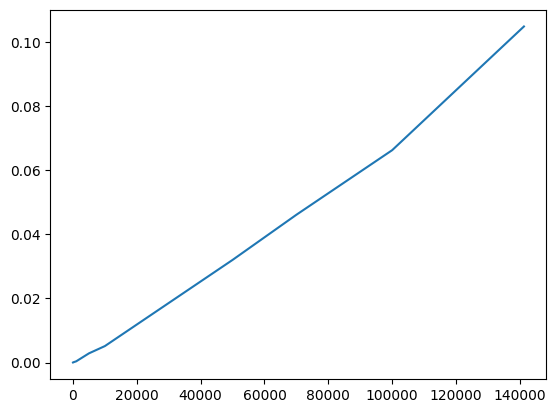

In [18]:
# # for 10 points per group
x = [10, 100, 1000, 5000, 10000, 50000, 70000, 100000, 141277]
y = [1.71661376953125e-05, 7.033348083496094e-05, 0.00037407875061035156, 0.0028641223907470703, 0.005137443542480469, 0.03202199935913086, 0.046115875244140625, 0.06626105308532715, 0.1048586368560791]
plt.plot(x, y)